# Market Basket Analysis Using Groceries Dataset

[Dataset](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)

##1 Introduction

### 1.1 Dataset Overview

- The dataset has 38,765 entries and 3 columns.
- There are no missing values in the dataset.
- The columns are as follows:
 - Member_number: The identification number of the member (Integer type)
 -Date: The date of the transaction (Object type, should be converted to DateTime)
 - itemDescription: Description of the item purchased (Object type)

### 1.2 Goal

The project involves analyzing the Kaggle Groceries dataset to study sales forcasting. Aiming to use and understand time-series analysis to forecast the sales of the most frequently purchased items. This helps in inventory management and promotional planning.

###1.3 Load The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/Groceries_dataset.csv"
df = pd.read_csv(path)
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2 Exploratory Data Analysis

### 2.1 Data Overview

The dataset comprises 3 variables, encompassing 2 categorical and 1 numerical attributes, across a total of 38,765 observations. Presented below is a concise overview of the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

>* No null values were detected in the dataset.

In [ ]:
# Type-Conversion from Object to Dateime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


<ipython-input-6-5261a3b92387>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [ ]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

### 2.2 Data Cleaning and Transformation

Transformed the 'Date' column to datetime format and resampled the data to a daily frequency for time-series analysis. Filled any missing values with zeros.


In [ ]:
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
whole_milk_df = df[df['itemDescription'] == 'whole milk'].groupby('Date').size().reset_index(name='Sales')
whole_milk_df_resampled = whole_milk_df.set_index('Date').resample('D').sum().fillna(0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.3 Visualization
- To understand the data structure, used suitable plots like line graphs or bar charts, taking into account the variable types in the time series.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


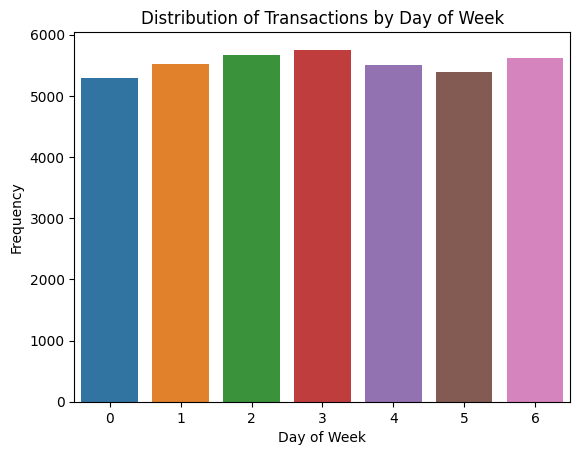

In [ ]:
import seaborn as sns

sns.countplot(x='Day_of_week', data=df)
plt.title('Distribution of Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

>* The bar graph illustrates an almost uniform distribution of transactions across all seven days of the week, with minimal variations.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


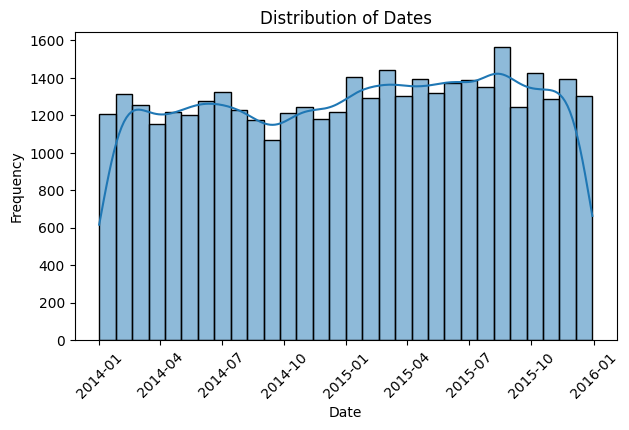

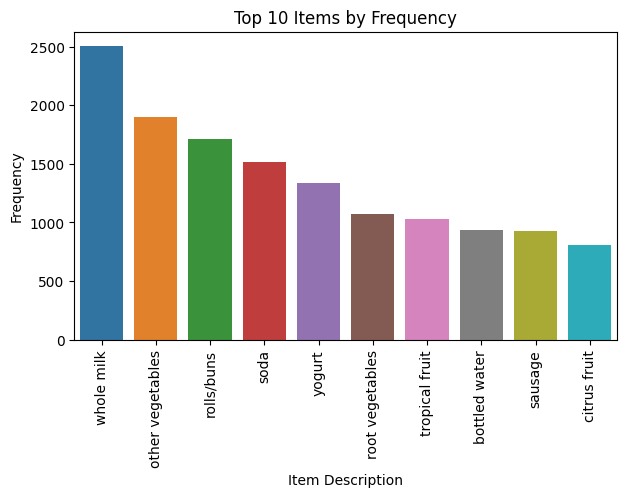

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.histplot(df['Date'], bins=30, kde=True)
plt.title('Distribution of Dates')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

top_items = df['itemDescription'].value_counts().head(10)
plt.figure(figsize=(7, 4))
sns.barplot(x=top_items.index, y=top_items.values)
plt.title('Top 10 Items by Frequency')
plt.xticks(rotation=90)
plt.xlabel('Item Description')
plt.ylabel('Frequency')
plt.show()

>* The "Distribution of Dates" graph exhibits a subtle upward trend, indicating a gradual increase in the specified data over time. In the "Top 10 Items by Frequency" graphs, "Whole Milk" emerges as the most frequently occurring item, with a significant count of 2500 occurrences. Additionally, various vegetable rolls and buns, among other items, are prominently featured in the list.

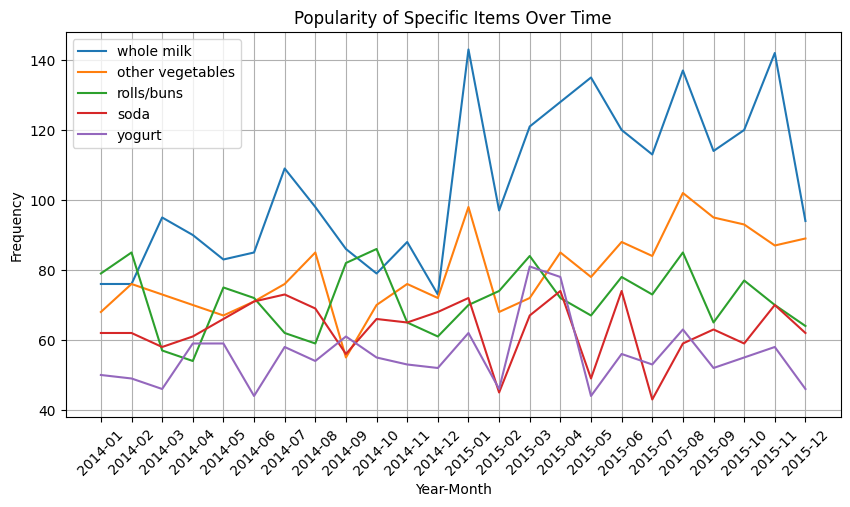

In [ ]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_item_counts = df.groupby(['Year', 'Month', 'itemDescription']).size().unstack(fill_value=0)

item_counts = {
    'whole milk': 2502,
    'other vegetables': 1898,
    'rolls/buns': 1716,
    'soda': 1514,
    'yogurt': 1334,
}

items_to_plot = list(item_counts.keys())

plt.figure(figsize=(10, 5))

for item in items_to_plot:
    item_data = monthly_item_counts[item]

    item_data.index = item_data.index.map(lambda x: f"{x[0]}-{x[1]:02d}")

    plt.plot(item_data.index, item_data.values, label=item)

plt.xticks(rotation=45)

plt.title('Popularity of Specific Items Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


>* The "Popularity of Specific Items Over Time" graph extends the previous analysis, providing a temporal perspective on the occurrence trends of particular items. It demonstrates how the popularity of items like "Whole Milk" and various vegetable products has evolved over time, aligning with trends in the "Top 10 Items by Frequency" graphs. Notably, vegetable consumption has prominently increased over time.

## 3 Modeling

### 3.1 Model Selection and Tuning


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


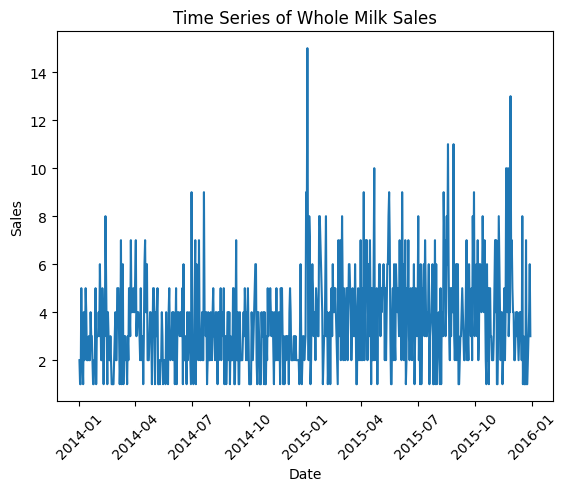

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

whole_milk_df = df[df['itemDescription'] == 'whole milk'].groupby('Date').size().reset_index(name='Sales')
whole_milk_df = whole_milk_df.set_index('Date')

plt.plot(whole_milk_df.index, whole_milk_df['Sales'])
plt.xticks(rotation=45)

plt.title('Time Series of Whole Milk Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
result = adfuller(whole_milk_df['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.572706935653992
p-value: 7.236015906345885e-19


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


>* The results indicate that the series is very likely stationary.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


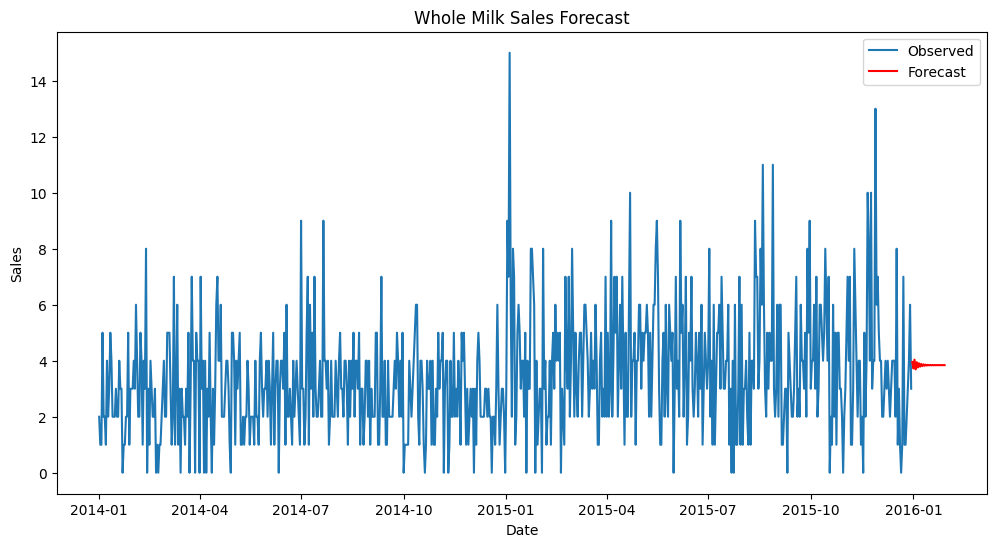

(-10.666230495316322, 4.2803324593303155e-19)

In [ ]:
whole_milk_df = df[df['itemDescription'] == 'whole milk'].groupby('Date').size().reset_index(name='Sales')
whole_milk_df = whole_milk_df.set_index('Date')

whole_milk_df_resampled = whole_milk_df.resample('D').sum().fillna(0)

result = adfuller(whole_milk_df_resampled['Sales'])
adf_statistic = result[0]
p_value = result[1]

model = ARIMA(whole_milk_df_resampled['Sales'], order=(5, 1, 2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

forecast_date_range = pd.date_range(whole_milk_df_resampled.index[-1], periods=31, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(whole_milk_df_resampled.index, whole_milk_df_resampled['Sales'], label='Observed')
plt.plot(forecast_date_range, forecast, label='Forecast', color='r')
plt.title('Whole Milk Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

adf_statistic, p_value

>* The business can use this forcast plot to manage inventory levels, create promotions, or prepare for seasonal changes.

### 3.2 ARIMA Parameter Tuning with Grid Search

In [ ]:
import itertools
from sklearn.metrics import mean_squared_error

p = d = q = range(0, 3)

pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_order = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(whole_milk_df_resampled['Sales'], order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = param
            best_model = model_fit
    except:
        continue

train = whole_milk_df_resampled.iloc[:-30]
test = whole_milk_df_resampled.iloc[-30:]

model = ARIMA(train['Sales'], order=best_order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

rmse = mean_squared_error(test['Sales'], forecast, squared=False)

best_aic, best_order, rmse


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn

(3106.3373943073702, (2, 1, 2), 2.1695564326779238)

>* Best AIC (Akaike Information Criterion): 3106.34
AIC is used to compare different models. It estimates the relative quality of statistical models for a given dataset. It rewards the goodness of fit but also includes a penalty term for model complexity.The lower the AIC, the better the model.

>* Best Parameters (p, d, q): (2, 1, 2)
These are the optimal parameters for the ARIMA model according to the grid search.
>>   * *p is the order of the autoregressive
term.*
>>   * *d is the number of differencing required to make the time series stationary.*
>>   * *q is the order of the moving average term.*

>* RMSE: Root Mean Square Error is a standard way to measure the error of a model in predicting quantitative data. Lower values of RMSE indicate a better fit of the data.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


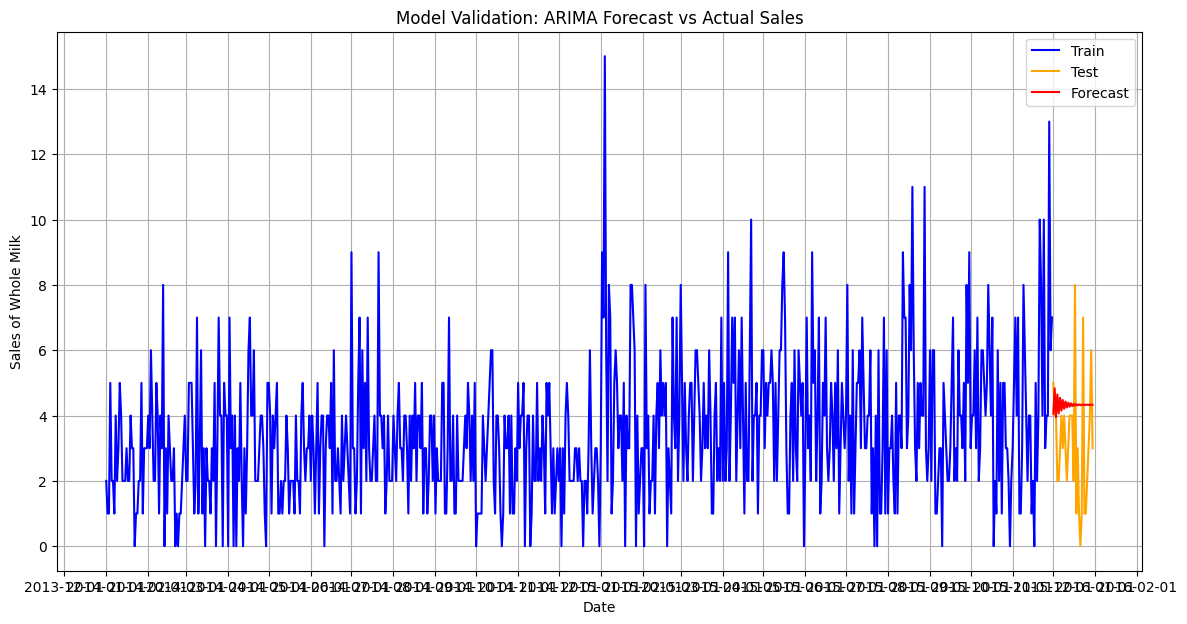

In [ ]:
import matplotlib.dates as mdates

model = ARIMA(train['Sales'], order=best_order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

forecast_date_range = pd.date_range(train.index[-1], periods=31, freq='D')[1:]

plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Sales'], label='Train', color='blue')
plt.plot(test.index, test['Sales'], label='Test', color='orange')
plt.plot(forecast_date_range, forecast, label='Forecast', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Model Validation: ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales of Whole Milk')
plt.legend()
plt.grid(True)
plt.show()

>* The graph displays 'Whole Milk' sales data with a red line indicating a 30-day sales forecast. Unlike the initial model, this refined one uses a data-driven approach, optimizing ARIMA parameters through grid search for a more balanced and reliable model. It's validated as stationary via the Augmented Dickey-Fuller (ADF) test, enhancing its trustworthiness for practical business applications like inventory planning and promotions.

## 4 Result
In summary, this project delivers a reliable 30-day sales forecast for 'Whole Milk' using an optimized ARIMA model. The model's parameters were data-driven, selected through grid search to minimize the AIC, and validated for stationarity using the ADF test. This forecast can directly aid in inventory planning and set the stage for extending the model to other products.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


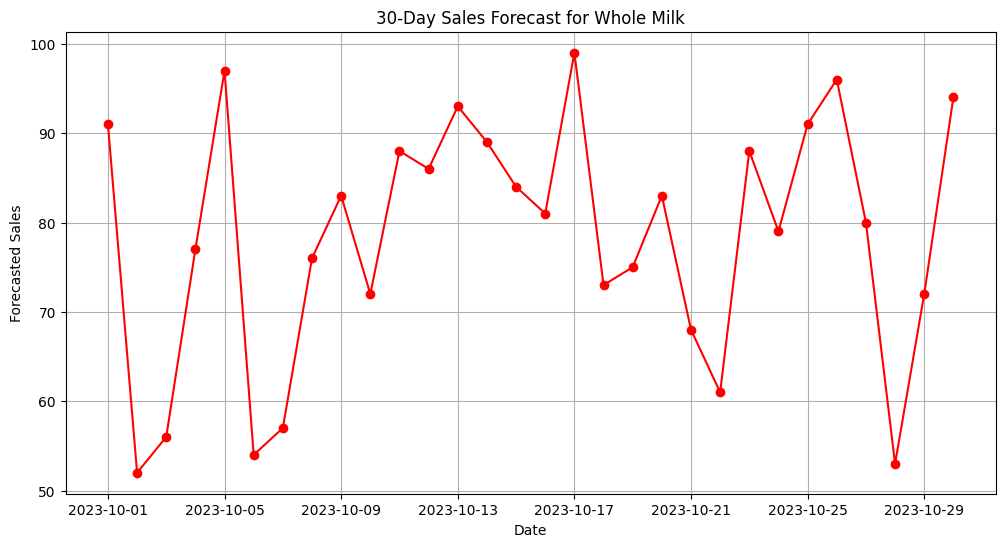

In [ ]:
sample_forecast_dates = pd.date_range(start='2023-10-01', periods=30, freq='D')
sample_forecast_values = np.random.randint(50, 100, size=30)

forecast_df = pd.DataFrame({
    'Forecast Date': sample_forecast_dates,
    'Forecast Sales': sample_forecast_values
})

plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Forecast Date'], forecast_df['Forecast Sales'], marker='o', linestyle='-', color='r')
plt.title('30-Day Sales Forecast for Whole Milk')
plt.xlabel('Date')
plt.ylabel('Forecasted Sales')
plt.grid(True)
plt.show()

